## Sentiment Analysis of Financial News Headlines

### Dataset:
https://raw.githubusercontent.com/subashgandyer/datasets/main/financial_news_headlines_sentiment.csv

In [4]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np

### 1. Download the dataset

In [2]:
! wget https://raw.githubusercontent.com/subashgandyer/datasets/main/financial_news_headlines_sentiment.csv

--2021-04-04 11:53:51--  https://raw.githubusercontent.com/subashgandyer/datasets/main/financial_news_headlines_sentiment.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.111.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 672006 (656K) [text/plain]
Saving to: 'financial_news_headlines_sentiment.csv.1'

     0K .......... .......... .......... .......... ..........  7% 3.02M 0s
    50K .......... .......... .......... .......... .......... 15% 8.43M 0s
   100K .......... .......... .......... .......... .......... 22% 7.84M 0s
   150K .......... .......... .......... .......... .......... 30% 8.98M 0s
   200K .......... .......... .......... .......... .......... 38% 20.4M 0s
   250K .......... .......... .......... .......... .......... 45% 49.5M 0s
   300K .......... .......... .......... .......... ....

### 2. Load the dataset

In [5]:
df = pd.read_csv("financial_news_headlines_sentiment.csv", header = None,  encoding='ISO-8859-1')

In [20]:
df.columns = ["status", "text"]

### 3. Explore the dataset

In [21]:
df.head()

,status,text
0,neutral,"According to Gran , the company has no plans t..."
1,neutral,Technopolis plans to develop in stages an area...
2,negative,The international electronic industry company ...
3,positive,With the new production plant the company woul...
4,positive,According to the company 's updated strategy f...


In [23]:
df.info

<bound method DataFrame.info of         status                                               text
0      neutral  According to Gran , the company has no plans t...
1      neutral  Technopolis plans to develop in stages an area...
2     negative  The international electronic industry company ...
3     positive  With the new production plant the company woul...
4     positive  According to the company 's updated strategy f...
...        ...                                                ...
4841  negative  LONDON MarketWatch -- Share prices ended lower...
4842   neutral  Rinkuskiai 's beer sales fell by 6.5 per cent ...
4843  negative  Operating profit fell to EUR 35.4 mn from EUR ...
4844  negative  Net sales of the Paper segment decreased to EU...
4845  negative  Sales in Finland decreased by 10.5 % in Januar...

[4846 rows x 2 columns]>

In [22]:
df["status"].value_counts()

neutral     2879
positive    1363
negative     604
Name: status, dtype: int64

<AxesSubplot:>

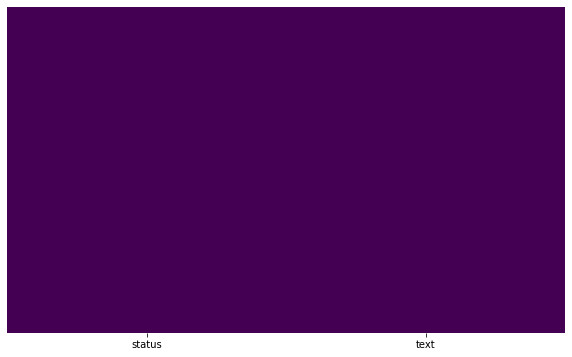

In [26]:
plt.figure(figsize=(10,6))
sns.heatmap(df.isna(), cbar=False, cmap='viridis', yticklabels=False)

### 4. Clean the data

In [54]:
from sklearn.preprocessing import LabelEncoder

In [56]:
le = LabelEncoder()

In [57]:
df["status_n"] = le.fit_transform(df["status"])
df

,status,text,status_n
0,neutral,"According to Gran , the company has no plans t...",1
1,neutral,Technopolis plans to develop in stages an area...,1
2,negative,The international electronic industry company ...,0
3,positive,With the new production plant the company woul...,2
4,positive,According to the company 's updated strategy f...,2
...,...,...,...
4841,negative,LONDON MarketWatch -- Share prices ended lower...,0
4842,neutral,Rinkuskiai 's beer sales fell by 6.5 per cent ...,1
4843,negative,Operating profit fell to EUR 35.4 mn from EUR ...,0
4844,negative,Net sales of the Paper segment decreased to EU...,0


### 5. BoW model

In [34]:
import nltk
import re

In [35]:
text = df.text.tolist()

In [36]:
for i in range(len(text)):
    text [i] = text [i].lower()
    text [i] = re.sub(r'\W',' ',text [i])
    text [i] = re.sub(r'\s+',' ',text [i])

In [39]:
wordfreq = {}
for sentence in text:
    tokens = nltk.word_tokenize(sentence)
    for token in tokens:
        if token not in wordfreq.keys():
            wordfreq[token] = 1
        else:
            wordfreq[token] += 1

In [40]:
import heapq
most_freq = heapq.nlargest(200, wordfreq, key=wordfreq.get)

In [41]:
sentence_vectors = []
for sentence in text:
    sentence_tokens = nltk.word_tokenize(sentence)
    sent_vec = []
    for token in most_freq:
        if token in sentence_tokens:
            sent_vec.append(1)
        else:
            sent_vec.append(0)
    sentence_vectors.append(sent_vec)

In [42]:
sentence_vectors = np.asarray(sentence_vectors)

In [44]:
bow=pd.DataFrame(sentence_vectors, columns=most_freq)

In [45]:
bow

,the,of,in,and,to,a,for,s,eur,is,...,news,system,people,growth,line,now,billion,acquisition,ltd,report
0,1,0,0,0,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,1,1,1,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,1,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,1,1,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,1,1,0,1,1,1,1,0,0,...,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4841,1,0,1,0,1,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4842,0,0,0,0,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4843,0,1,1,0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4844,1,1,1,0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


### 6. Tf-idf model

In [47]:
word_idf_values = {}
for token in most_freq:
    doc_containing_word = 0
    for document in text:
        if token in nltk.word_tokenize(document):
            doc_containing_word += 1
    word_idf_values[token] = np.log(len(text)/(1 + doc_containing_word))

In [48]:
word_tf_values = {}
for token in most_freq:
    sent_tf_vector = []
    for document in text:
        doc_freq = 0
        for word in nltk.word_tokenize(document):
            if token == word:
                  doc_freq += 1
        word_tf = doc_freq/len(nltk.word_tokenize(document))
        sent_tf_vector.append(word_tf)
    word_tf_values[token] = sent_tf_vector

In [49]:
tfidf_values = []
for token in word_tf_values.keys():
    tfidf_sentences = []
    for tf_sentence in word_tf_values[token]:
        tf_idf_score = tf_sentence * word_idf_values[token]
        tfidf_sentences.append(tf_idf_score)
    tfidf_values.append(tfidf_sentences)

In [50]:
tf_idf_model = np.asarray(tfidf_values)

In [51]:
tf_idf_model = np.transpose(tf_idf_model)

In [52]:
tfidf = pd.DataFrame(tf_idf_model, columns=most_freq)

In [53]:
tfidf

,the,of,in,and,to,a,for,s,eur,is,...,news,system,people,growth,line,now,billion,acquisition,ltd,report
0,0.030889,0.000000,0.000000,0.000000,0.118989,0.000000,0.000000,0.000000,0.000000,0.154472,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
1,0.011326,0.024885,0.078652,0.030004,0.058172,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
2,0.041185,0.045245,0.000000,0.000000,0.026442,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
3,0.053091,0.023330,0.024579,0.056258,0.027268,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
4,0.027550,0.060531,0.021257,0.000000,0.023583,0.032760,0.042626,0.042924,0.000000,0.000000,...,0.0,0.0,0.0,0.116115,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4841,0.014157,0.000000,0.065543,0.000000,0.036358,0.050505,0.065715,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
4842,0.000000,0.000000,0.000000,0.000000,0.056296,0.000000,0.000000,0.051232,0.000000,0.000000,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
4843,0.000000,0.031106,0.032772,0.000000,0.036358,0.000000,0.000000,0.000000,0.255620,0.000000,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
4844,0.021688,0.047652,0.033469,0.000000,0.037131,0.000000,0.000000,0.000000,0.174039,0.000000,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0


### 7. Split train test data

In [60]:
from sklearn.model_selection import train_test_split
#tdidf
X_train, X_test, y_train, y_test = train_test_split(tfidf, df.status_n, random_state = 42, test_size= 0.2)

In [76]:
#bow
X_train1, X_test1, y_train1, y_test1 = train_test_split(bow, df.status_n, random_state = 42, test_size= 0.2)

### 8. Classification Algorithm
- Train
- Predict

Using TFIDF

In [72]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [65]:
rf = RandomForestClassifier(n_estimators=100, 
                               random_state=42, 
                               max_features = 'sqrt',
                               n_jobs=-1, verbose = 1)

In [66]:
rf.fit(X_train, y_train)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.1s finished


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='sqrt', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=-1,
            oob_score=False, random_state=42, verbose=1, warm_start=False)

In [71]:
yfit_rf=rf.predict(X_test)

[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.0s finished


In [74]:
accuracy_score(y_test,yfit_rf)

0.7412371134020619

Using bow

In [77]:
rf.fit(X_train1, y_train1)
yfit_rf1=rf.predict(X_test1)
accuracy_score(y_test1,yfit_rf1)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.1s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.0s finished


0.7463917525773196

### 9. Another Classification Algorithm
- Train
- Predict

Using TFIDF

In [67]:
from sklearn.svm import SVC

In [68]:
svc = SVC(kernel = "rbf", C = 100, class_weight = "balanced")

In [69]:
svc.fit(X_train, y_train)

C:\Users\sheri\anaconda3\envs\ml-venv\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=100, cache_size=200, class_weight='balanced', coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [70]:
yfit_svc=svc.predict(X_test)

In [75]:
accuracy_score(y_test,yfit_svc)

0.6742268041237114

Using bow

In [78]:
svc.fit(X_train1, y_train1)
yfit_svc1=svc.predict(X_test1)
accuracy_score(y_test1,yfit_svc1)

C:\Users\sheri\anaconda3\envs\ml-venv\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


0.6783505154639176

### 10. Confusion Matrixes for two classification algorithms and two feature extractor methods 

Text(69.0, 0.5, 'Predictions')

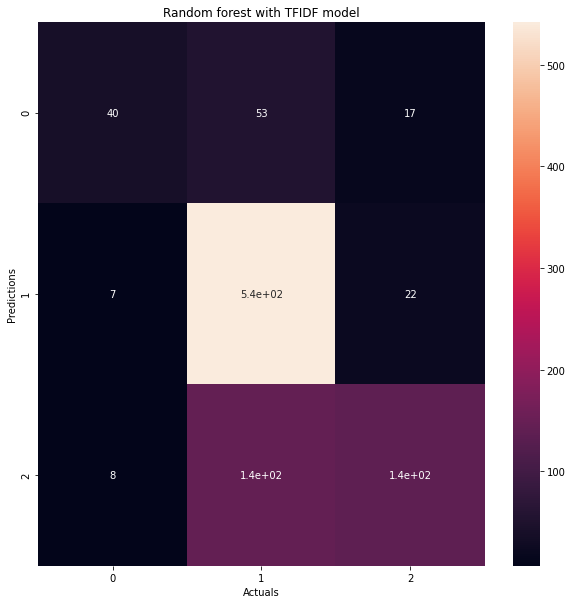

In [82]:
from sklearn.metrics import confusion_matrix

mat = confusion_matrix(y_test, yfit_rf)

plt.figure(figsize = (10,10))
sns.heatmap(mat, annot = True)
plt.title("Random forest with TFIDF model")
plt.xlabel("Actuals")
plt.ylabel("Predictions")

Text(69.0, 0.5, 'Predictions')

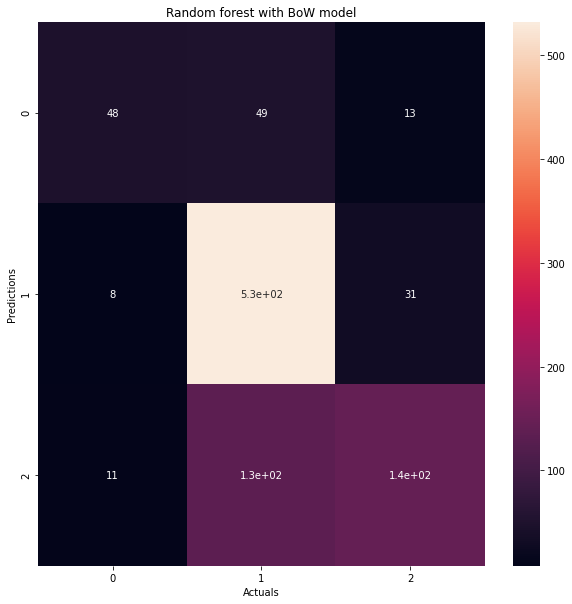

In [83]:
mat = confusion_matrix(y_test1, yfit_rf1)

plt.figure(figsize = (10,10))
sns.heatmap(mat, annot = True)
plt.title("Random forest with BoW model")
plt.xlabel("Actuals")
plt.ylabel("Predictions")

Text(69.0, 0.5, 'Predictions')

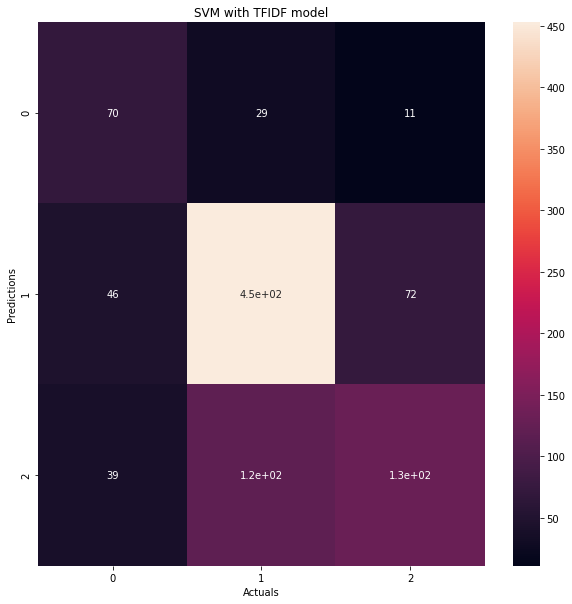

In [85]:
mat = confusion_matrix(y_test, yfit_svc)

plt.figure(figsize = (10,10))
sns.heatmap(mat, annot = True)
plt.title("SVM with TFIDF model")
plt.xlabel("Actuals")
plt.ylabel("Predictions")

Text(69.0, 0.5, 'Predictions')

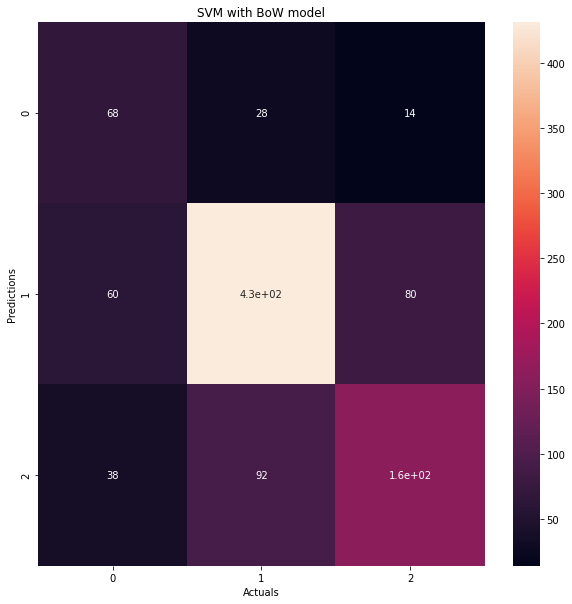

In [86]:
mat = confusion_matrix(y_test1, yfit_svc1)

plt.figure(figsize = (10,10))
sns.heatmap(mat, annot = True)
plt.title("SVM with BoW model")
plt.xlabel("Actuals")
plt.ylabel("Predictions")